In [245]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, PercentFormatter)

In [2]:
PATH = os.getcwd()
base_data = pd.read_excel('globalterrorismdb_0718dist.xlsx')

In [3]:
data = base_data[base_data['region'].isin(['8','9'])]
ctr_to_keep = ['15','21','32','50','53','54','55','64','69','69','75','78',
              '90','96','98','109','115','116','124','142','161','162','166',
              '179','180','185','198','236','362','499','603']
data = data[data['country'].isin(ctr_to_keep)]

# nkill - total number of fatalities
# nwound - total number of injured
# iyear - year of attack
# country - country code
# country_txt - country name
# eventid - eventid

In [4]:
# unifying Germany :)

data = data.replace({'country_txt': r'.{1,}Germany.{1,}'},{'country_txt': 'Germany'},regex=True)
data.country_txt.unique()
## CROATIA as part of Yugoslavia will be excluded 

data = data[['country','country_txt','nkill','nwound','iyear','eventid']]

data_93 = pd.read_excel('1993_data.xlsx')

In [263]:
figures = []

## 1st figure: Casualities of terror attacks EU28 (1970-2017)

In [264]:
font = {'family' : 'Bahnschrift',
        'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)

In [265]:
# data.pivot_table(index=['country_txt','geo','iyear'],columns='iyear',values='Variable',aggfunc=np.sum) 
work = data.groupby(['iyear']).agg({'nkill':'sum','nwound':'sum','eventid':'count'}).reset_index()
work = work.append(data_93.groupby(['iyear']).agg({'nkill':'sum','nwound':'sum','eventid':'sum'}).reset_index())
fig1_data = work.sort_values(by=['iyear'])

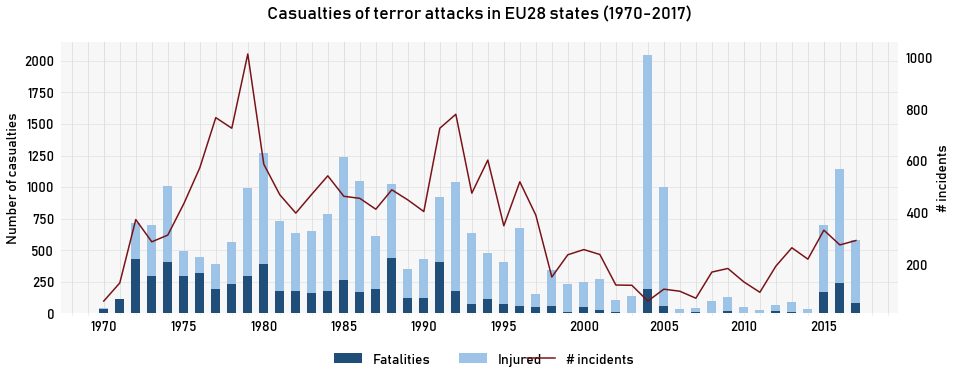

In [266]:
width = 0.55

fig, ax1 = plt.subplots()

def figure_1(ax1, work):
    ax1.set_ylabel('Number of casualties')
    ax1.grid(zorder=0)
    ax1.minorticks_off()

    majorLocator = MultipleLocator(5)
    # majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(1)

    ax1.xaxis.set_major_locator(majorLocator)
    # ax1.xaxis.set_major_formatter(majorFormatter)
    ax1.xaxis.set_minor_locator(minorLocator)

    ax1.tick_params(axis='x',which='minor',colors='#dddddd')
    ax1.grid(b=True, which='minor', color='#DDDDDD')
    ax1.tick_params(axis='both', grid_alpha=0.75, grid_color='#DDDDDD')

    ax1.bar(work['iyear'], work['nkill'], width, color='#1f4e79', zorder=3)
    ax1.bar(work['iyear'], work['nwound'], width, bottom=work['nkill'], color='#9dc3e6', zorder=3)

    ax2 = ax1.twinx()
    ax2.plot(work['iyear'], work['eventid'], color='#791216', zorder=4)
    ax2.set_ylabel('# incidents')

    ax1.tick_params(top='off', bottom='off', left='off', right='off', labelbottom='on')
    ax2.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off')

    ax1.set_facecolor('#F7F7F7')

    for ax in [ax1, ax2]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
    ax1.legend(['Fatalities','Injured'], ncol=2, loc='upper center', bbox_to_anchor=(0.45, -0.1),\
                frameon=False, fontsize=14)
    ax2.legend(['# incidents'], ncol=1, loc='upper center', bbox_to_anchor=(0.62, -0.1),\
                frameon=False, fontsize=14)
    
    ax1.set_title('Casualties of terror attacks in EU28 states (1970-2017)', fontsize=18, y=1.06)
    
figure_1(ax1, fig1_data)

fig.set_size_inches(15, 5)
plt.show()

## 2nd figure: Fatal casualities of terror attacks EU28 (1970-2017)

In [267]:
work = data.append(data_93, sort=False)
work = work.replace({'country_txt': r'.{1,}Germany.{1,}'},{'country_txt': 'Germany'},regex=True)
work = work.replace({'country_txt': {'United Kingdom': 'United Kingdom & Ireland', 'Ireland' : 'United Kingdom & Ireland'}})
work = work[work['country_txt'].isin(['Germany','United Kingdom & Ireland','France','Spain'])] 

work = work.groupby(['iyear','country_txt']).agg({'nkill':'sum'}).reset_index()
work.tail()

work = work.pivot_table(index=['iyear'],columns='country_txt',values='nkill').reset_index().fillna(0)

sorter = ["France","Spain","United Kingdom & Ireland","Germany"]
fig2_data = work[['iyear']+ sorter]

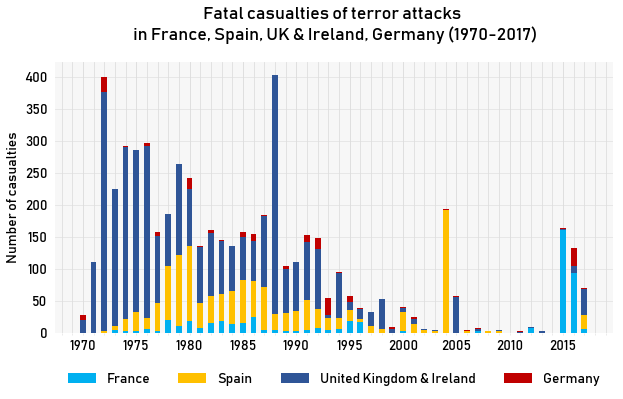

In [268]:
width = 0.55

fig, ax1 = plt.subplots()

def figure_2(ax1, work):
    ax1.set_ylabel('Number of casualties')
    ax1.grid(zorder=0)
    ax1.minorticks_off()

    majorLocator = MultipleLocator(5)
    # majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(1)

    ax1.xaxis.set_major_locator(majorLocator)
    # ax1.xaxis.set_major_formatter(majorFormatter)
    ax1.xaxis.set_minor_locator(minorLocator)

    ax1.tick_params(axis='x',which='minor',colors='#dddddd')
    ax1.grid(b=True, which='minor', color='#DDDDDD')
    ax1.tick_params(axis='both', grid_alpha=0.75, grid_color='#DDDDDD')

    colors = ['#00b0f0','#ffc000','#2f5597','#c00000']

    for i, col in enumerate(list(work.columns)[1:]):
        if i == 0:
            ax1.bar(work['iyear'], work[col], width, color=colors[i], zorder=3)
        else:
            ax1.bar(work['iyear'], work[col], width, color=colors[i], zorder=3,\
                bottom=work[work.columns[list(range(1,(i+1)))]].apply(sum,axis=1))

    ax1.tick_params(top='off', bottom='off', left='off', right='off', labelbottom='on')

    ax1.set_facecolor('#F7F7F7')

    for ax in [ax1]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
    ax1.legend(work.columns[1:], ncol=4, loc='upper center', bbox_to_anchor=(0.5, -0.1),\
                frameon=False, fontsize=14)
    
    ax1.set_title('Fatal casualties of terror attacks \n in France, Spain, UK & Ireland, Germany (1970-2017)', fontsize=18, y=1.06)
    
figure_2(ax1, fig2_data)

fig.set_size_inches(10, 5)
plt.show()

## 3rd figure: EU12 states w/ terror attacks

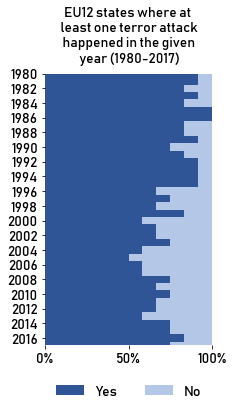

In [269]:
work = data.append(data_93, sort=False)
work = work.replace({'country_txt': r'.{1,}Germany.{1,}'},{'country_txt': 'Germany'},regex=True)
work = work[work['country_txt'].isin(['Germany','United Kingdom','Ireland','France','Spain','Belgium','Denmark',\
                                     'Greece','Italy','Luxembourg','Netherlands','Portugal'])]

work = work[work['eventid']!=0]
work = work.groupby(['iyear','country_txt']).agg({'eventid':'count'}).reset_index()

work = work.groupby(['iyear']).agg({"country_txt":'count'}).reset_index()
fig3_data = work[work['iyear'] >= 1980].sort_values(by=['iyear'],ascending=True)

fig, ax1 = plt.subplots()

def figure_3(ax1, work):
    ax1.barh(work['iyear'],(work['country_txt'])/12, height=1, color='#2f5597')
    ax1.barh(work['iyear'],1-(work['country_txt']/12), height=1, left=(work['country_txt'])/12, color='#b4c7e7')

    ax1.axis([0, 1, 2017, 1980])
    ax1.yaxis.set_major_locator(MultipleLocator(2))
    ax1.xaxis.set_major_locator(MultipleLocator(0.5))
    ax1.xaxis.set_major_formatter(PercentFormatter(xmax=1))

    for ax in [ax1]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
    ax1.legend(['Yes','No'], ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.1),\
                frameon=False, fontsize=14)
    
    ax1.set_title('EU12 states where at \n least one terror attack \n happened in the given \n year (1980-2017)', fontsize=14, y=1.02)
    
figure_3(ax1, fig3_data)

fig.set_size_inches(3, 5)
plt.show()

# work['iyear']

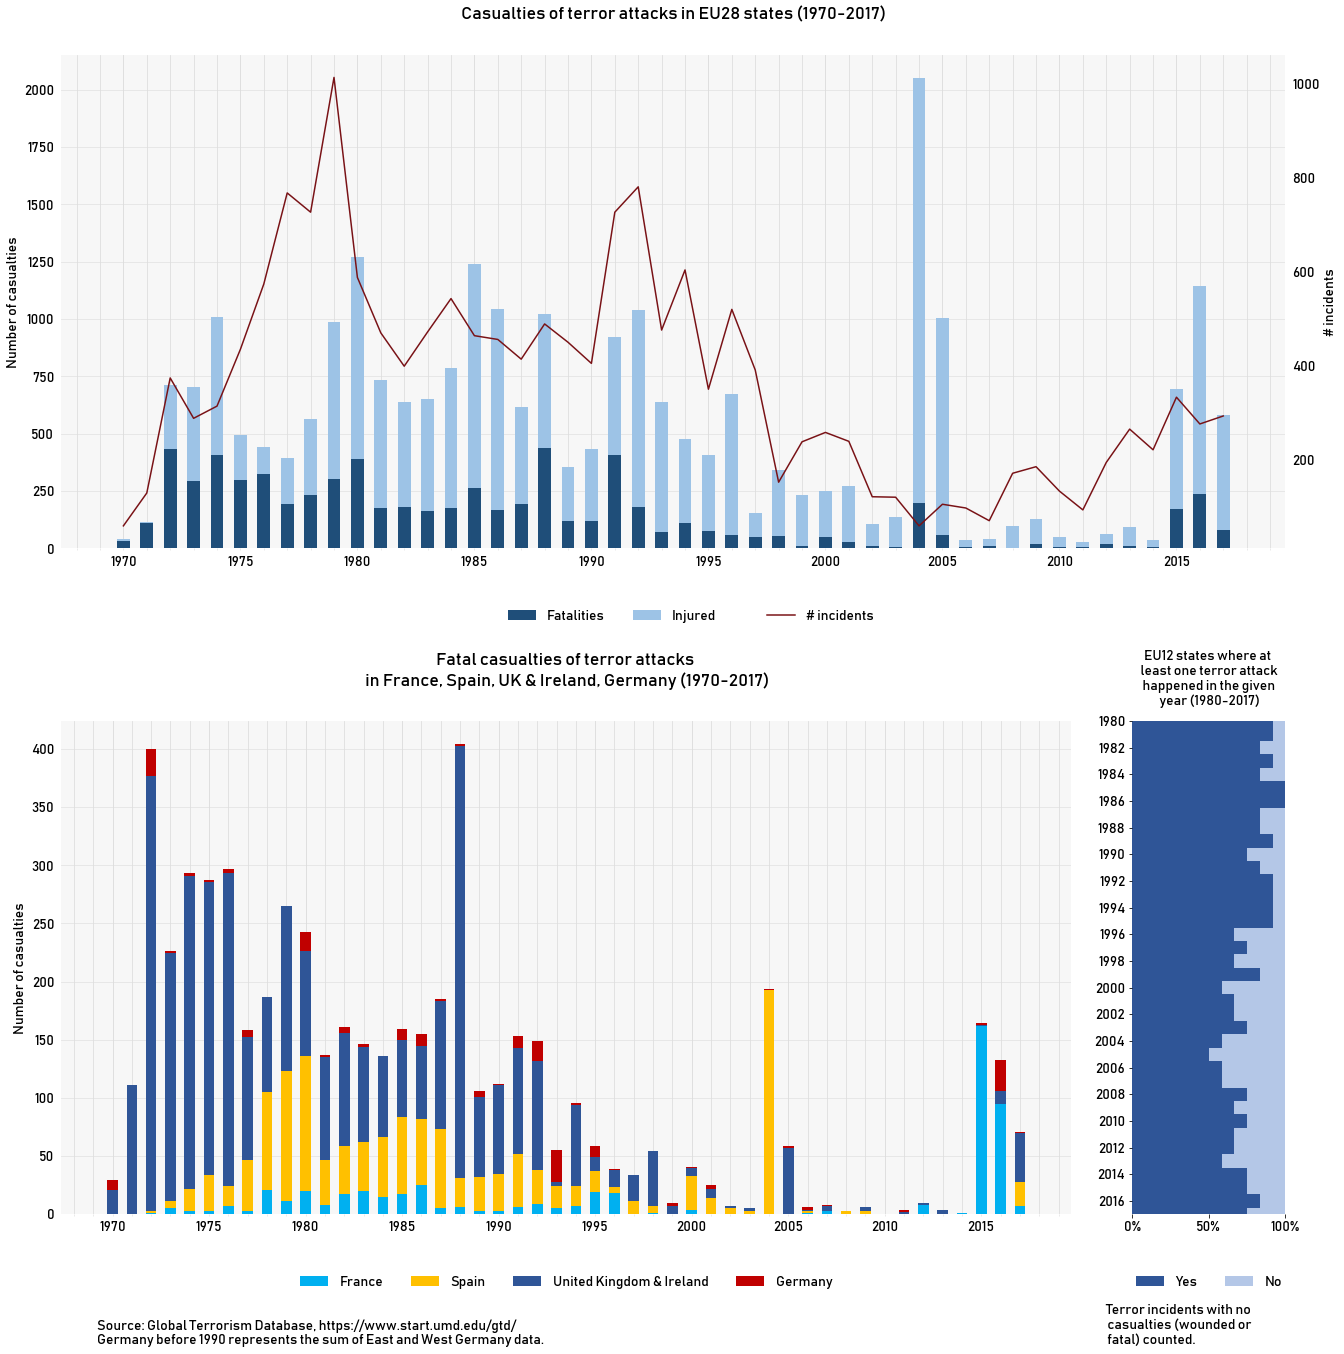

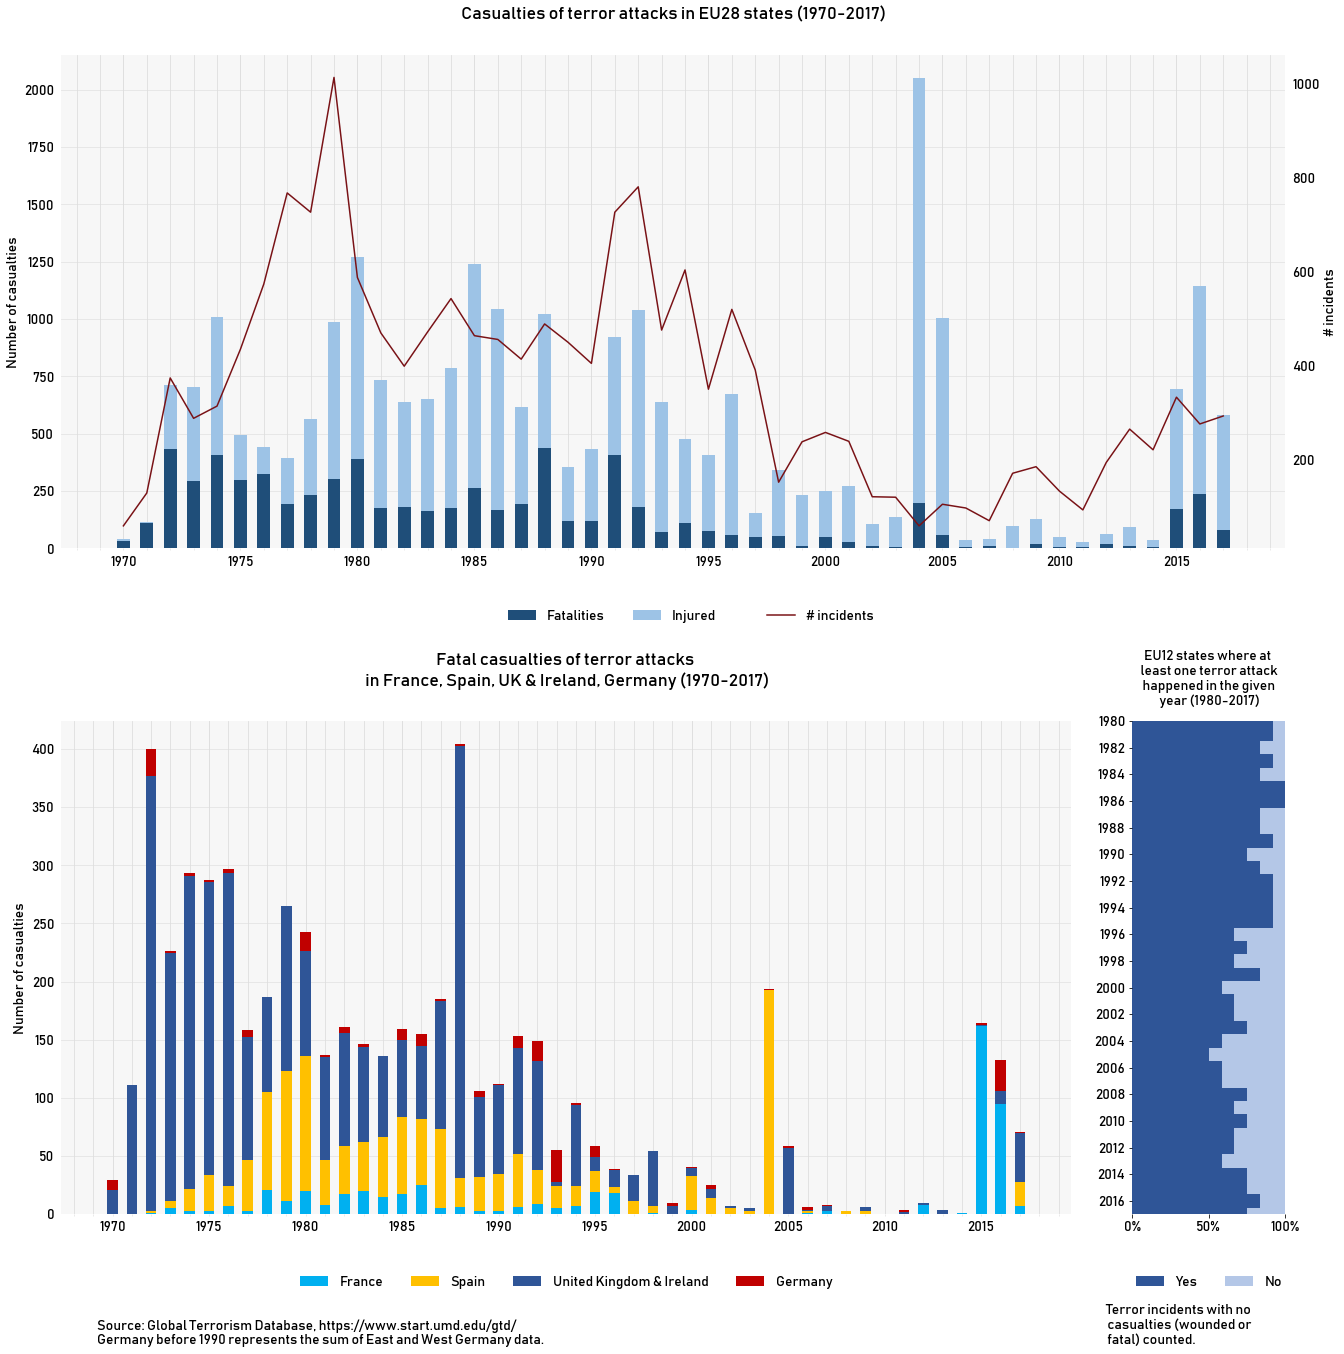

In [294]:
fig = plt.figure(figsize=(20, 20))
grid = plt.GridSpec(2, 6, wspace=0.4, hspace=0.35)
fig.subplots_adjust(bottom=0.12)
fig.subplots_adjust(top=0.925)
fig.subplots_adjust(left=0.075)
fig.subplots_adjust(right=0.925)

fig1 = plt.subplot(grid[0, 0:])
fig2 = plt.subplot(grid[1, :5])
fig3 = plt.subplot(grid[1, 5])

figure_1(fig1, fig1_data)
figure_2(fig2, fig2_data)
figure_3(fig3, fig3_data)

fig.text(0.1,0.04,'Source: Global Terrorism Database, https://www.start.umd.edu/gtd/',\
         fontsize=14,ha='left')
fig.text(0.1,0.03,'Germany before 1990 represents the sum of East and West Germany data.',fontsize=14,ha='left')

fig.text(0.8,0.03,'Terror incidents with no \n casualties (wounded or \n fatal) counted.',fontsize=14,ha='left')

fig.savefig('casualties_terror_attacks_2017.png', dpi=300)
fig